### <center>San Jose State University<br>Department of Applied Data Science</center>
#  <center>DATA 220<br>Mathematical Methods for Data Analysis</center>
### <center>Fall 2019<br>Instructor: Ron Mak</center>
#  <center>Assignment #8<br>Probability Problem Set<br>SOLUTIONS</center>
#### <center>100 points total (10 points each)<br><br>Work together with your lab partner.<br>Write your solutions in the indicated cells. You can use more cells if you need to.<br>You can compute by hand, but try use Python code and Python functions.<br>You can add your own functions or other support code.</center>
#### <center>Due Tuesday, November 5, 2019 at 6:00 PM</center>

#### <strong>PROBLEM 1.</strong> The first NASA mission to land men on the moon in July 1969 brought back 64 rock samples. The rock sample had an average weight of 172 ounces on Earth with a variance of 299 ounces squared. Scientists believe that the rock population on the lunar surface does not have a normal distribution. Nevertheless, find a 99% confidence interval for the mean weight of moon rocks.

The fact that the lunar rock population is not normal does not matter since with a sample size of 64, the Central Limit Theorem applies. From the standard normal table, we see that the critical value for z at the 99% confidence level is 2.58, or we can get that critical value by using the scipy.stats.norm.ppf function.

In [1]:
import math
import scipy.stats as stats

n = 64                  # sample size
x_bar = 172             # sample mean
s = 299                 # sample variance
x_sigma = math.sqrt(s)  # x_sigma

level = 99                                  # confidence level
z_cv  = -stats.norm.ppf((1 - level/100)/2)  # z critical value

interval = z_cv*(x_sigma/math.sqrt(n))
ci_lo    = x_bar - interval
ci_hi    = x_bar + interval

print(f'The {level}% confidence interval for the mean weight ' +
      f'of moon rocks is ({ci_lo:.2f}, {ci_hi:.2f})')

The 99% confidence interval for the mean weight of moon rocks is (166.43, 177.57)


#### <strong>PROBLEM 2.</strong> Farmer Brown and Farmer Green each plant 100 acres of corn under similar conditions. Farmer Brown's yield was 84 bushels per acre with a standard deviation of 5 bushels. Farmer Green's yield was 80 bushels per acre with a standard deviation of 6 bushels. What is the 90% confidence interval for the mean difference in yield between the two farms?

We're comparing two population means with two samples, each of size 100 acres. Let Farmer Brown have farm #1 and Farmer Green have farm #2. The Central Limit Theorem applies, and we use the test statistic whose formula is given in the October 15 lecture, slide #8. The critical value for z at the 90% confidence level is 1.645.

In [2]:
import math
import scipy.stats as stats

# Farmer Brown
n1       = 100
x1_bar   = 84
x1_sigma = 5

# Farmer Green
n2       = 100
x2_bar   = 80
x2_sigma = 6

level = 90                                  # confidence level
z_cv  = -stats.norm.ppf((1 - level/100)/2)  # z critical value

numerator = x1_bar - x2_bar
denominator = math.sqrt((x1_sigma*x1_sigma)/n1 + (x2_sigma*x2_sigma)/n2)
z = numerator/denominator

ci_lo = -z_cv*denominator + numerator
ci_hi =  z_cv*denominator + numerator

print(f'The {level}% confidence interval for the mean difference ' +
      f'in yields is ({ci_lo:.3f}, {ci_hi:.3f})')

The 90% confidence interval for the mean difference in yields is (2.715, 5.285)


#### <strong>PROBLEM 3.</strong> SJSU bought 36 bulbs for its classroom projectors. The manufacturer claimed that the bulbs should each last more than 800 hours. After using the bulbs, the university discovered that their mean lifetime was 816 hours with a standard deviation of 70 hours. At the 5% level of significance, should the university accept the manufacturer's claim?

Let the null hypothesis H0: µ = 800 hours and the alternative hypothesis Ha: µ > 800 hours. This is therefore an upper-tailed test and the z critical value is 1.645.

In [3]:
# H0: µ = 800
# Ha: µ > 800

import math
import scipy.stats as stats

mu = 800
n = 36
x_bar = 816
x_sigma = 70
std_err = x_sigma/math.sqrt(n)

print(f'               n = {n}')
print(f'           x_bar = {x_bar:.2f}')
print(f'         x_sigma = {x_sigma:.2f}')
print(f'         std_err = {std_err:.2f}')

level = 0.05
z_cv = -stats.norm.ppf(level)  # critical value for an upper-tailed test
z = (x_bar - mu)/std_err       # test statistic

print()
print(f'           level = {level:.2f}')
print(f'z critical value = {z_cv:.2f}')
print(f'               z = {z:.2f}')

print()
print(f'Reject H0 if z > {z_cv:.2f}')

reject = z > z_cv

print('Therefore, ', end = '')
if reject:
    print('reject H0: µ = 800.')
else:
    print('do not reject H0: We cannot accept the claim that µ > 800.')

               n = 36
           x_bar = 816.00
         x_sigma = 70.00
         std_err = 11.67

           level = 0.05
z critical value = 1.64
               z = 1.37

Reject H0 if z > 1.64
Therefore, do not reject H0: We cannot accept the claim that µ > 800.


#### <strong>PROBLEM 4.</strong> A widget making machine is supposed to make widgets that are 0.05 inches thick. Ten widgets are tested each day to ensure the machine is properly calibrated. Today's test averaged 0.053 inches thick with a standard deviation of 0.003. At the 5% level of significance, is the machine properly calibrated?

Let the null hypothesis H0: µ = 0.05 inches and the alternative hypothesis Ha: µ ≠ 0.05 inches for a two-tailed test. Ten is a small sample size, so we must use Student's t. At the 5% level of significance and 9 degrees of freedom, the t critical value is 2.26, which we can look up in a table or use the scipy.stats.t.ppf function.

In [4]:
# H0: µ = 0.05
# Ha: µ ≠ 0.05

import math
import scipy.stats as stats

n = 10
mu = 0.05
x_bar = 0.053
x_sigma = 0.003
std_err = x_sigma/math.sqrt(n)

print(f'               n = {n}')
print(f'           x_bar = {x_bar:.4f}')
print(f'         x_sigma = {x_sigma:.4f}')
print(f'         std_err = {std_err:.4f}')

level = 0.05  # level of significance
df = n - 1    # degrees of freedom

t_cv = -stats.t.ppf(level/2, df)  # t critical value for a two-tailed test
t = (x_bar - mu)/std_err          # test statistic

print()
print(f'           level = {level:.2f}')
print(f't critical value = {t_cv:.2f}')
print(f'               t = {t:.2f}')

print()
print(f'Reject H0 if (t < {-t_cv:.2f}) or (t > {t_cv:.2f})')

reject = (t < -t_cv) or (t > t_cv)

print('Therefore, ', end = '')
if reject:
    print('reject H0: The machine needs to be recalibrated.')
else:
    print('do not reject H0: We cannot conclude that the machine is not properly calibrated.')

               n = 10
           x_bar = 0.0530
         x_sigma = 0.0030
         std_err = 0.0009

           level = 0.05
t critical value = 2.26
               t = 3.16

Reject H0 if (t < -2.26) or (t > 2.26)
Therefore, reject H0: The machine needs to be recalibrated.


#### <strong>PROBLEM 5.</strong> Farmer Brown's cows have averaged 380 pounds in weight. He selects 50 of his cows to put on a new diet to make them gain weight. After being on the new diet, the selected cows weigh an average of 390 pounds with a standard deviation of 35.2 pounds. What are the null and alternative hypotheses? What is the lowest level of significance at which we can reject the null hypothesis?

This is an upper-tailed test. We need the area under the curve to the right of the z test statistic. We can use the cumulative distribution function math.stats.norm.cdf (which gives us the area to the left of the test statistic) and take 1 minus the returned value. The resulting area to the right is the P-value. If we then choose any level of significance α smaller than this P-value, we cannot reject H0 at that level.

In [5]:
# H0: µ = 380
# Ha: µ > 380

import math
import scipy.stats as stats
from scipy.stats import norm

mu = 380
n = 50
x_bar = 390
x_sigma = 35.2
std_err = x_sigma/math.sqrt(n)

print(f'               n = {n}')
print(f'           x_bar = {x_bar:.2f}')
print(f'         x_sigma = {x_sigma:.2f}')
print(f'         std_err = {std_err:.2f}')

z = (x_bar - mu)/std_err   # test statistic
p_value = 1 - norm.cdf(z)  # upper-tailed test

print()
print(f'               z = {z:.2f}')
print(f'         P-value = {p_value:.4f}')

               n = 50
           x_bar = 390.00
         x_sigma = 35.20
         std_err = 4.98

               z = 2.01
         P-value = 0.0223


#### <strong>PROBLEM 6.</strong> Five friends try a new health club to try to lose weight. They record how many pounds each lost and the number of weeks it took. Assume there is a linear relationship between the pounds lost and the number of weeks. What is the slope of the regression line? What is its slope? Create a scatter graph of the data and the regression line.

<table border="1">
    <tr>
        <th>Friend #:</th>
        <th>1</th>
        <th>2</th>
        <th>3</th>
        <th>4</th>
        <th>5</th>
    </tr>
    <tr>
        <th>Pounds:</th>
        <td>3</td>
        <td>2</td>
        <td>1</td>
        <td>4</td>
        <td>5</td>
    </tr>
    <tr>
        <th>Weeks:</th>
        <td>6</td>
        <td>5</td>
        <td>4</td>
        <td>9</td>
        <td>11</td>
    </tr>
</table>    

In [6]:
import numpy as np

def calculate_means_and_sums(x_values, y_values):
    """
    Calculate means and sums.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of n, sum_x, sum_y, sum_xx, sum_yy, and sum_xy.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)

    return n, mean_x, mean_y, sum_x, sum_y, sum_xx, sum_yy, sum_xy

In [7]:
import numpy as np

def calculate_slope_intercept(x_values, y_values):
    """
    Calculate the slope and intercept of a regression line.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of the slope and y-intercept of the line.
    """
    n, mean_x, mean_y, sum_x, sum_y, sum_xx, sum_yy, sum_xy = \
        calculate_means_and_sums(x_values, y_values)

    numerator   = sum_xy - n*mean_x*mean_y
    denominator = sum_xx - n*mean_x*mean_x

    m = numerator/denominator
    b = (mean_y - m*mean_x)
    
    return m, b  # slope and intercept

In [8]:
import matplotlib.pyplot as plt

def show_least_squares_line(title, x_label, y_label, 
                            x_values, y_values):
    """
    @param title the chart title.
    @param x_label the x-axis label.
    @param y_label the y-axis label.
    @param x_values the independent x values to plot.
    @param y_values the dependent y values to plot.
    """
    # First show the scatter plot.
    plt.scatter(x_values, y_values)
    
    # Now show the least squares line.
    m, b = calculate_slope_intercept(x_values, y_values)
    reg_line = [m*x + b for x in x_values]  # regression line
    plt.plot(xs, reg_line, color='red')

    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

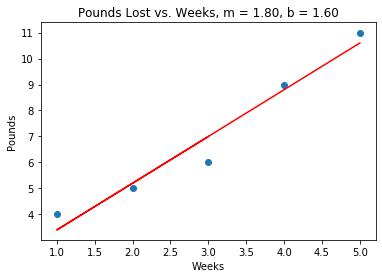

In [9]:
xs = [3, 2, 1, 4, 5]
ys = [6, 5, 4, 9, 11]

show_least_squares_line('Pounds Lost vs. Weeks', 'Weeks', 'Pounds', xs, ys)

#### <strong>PROBLEM 7.</strong> Use the data from Problem 6. Calculate and print:
- the variation in the pounds lost that cannot be explained by the weeks on the diet
- the total variation in the pounds lost
- the percentage of variation that is explained by the weeks on the diet
- the correlation coefficient 

The variation in the pounds lost that cannot be explained by the weeks on the diet is the residual sum of squares (deviations from the regression line, or predicted weekly pounds lost). The total variation in pounds lost is the total sum of squares (deviations from the average pounds lost). The coefficient of determination r2 is the proportion of variation in y that can be attributed to the linear relationship between weeks and pounds lost. The correlation coefficient r is the square root of r2.

In [10]:
import numpy as np

def calculate_y_variations(x_values, y_values):
    """
    Calculate the variations of the y values.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of the residual and total sums of squares.
    """
    n, mean_x, mean_y, sum_x, sum_y, sum_xx, sum_yy, sum_xy = \
        calculate_means_and_sums(x_values, y_values)

    numerator   = sum_xy - n*mean_x*mean_y
    denominator = sum_xx - n*mean_x*mean_x
    
    m = numerator/denominator
    b = (mean_y - m*mean_x)
    
    ss_residual = sum_yy - b*sum_y - m*sum_xy
    ss_total    = sum_yy - (sum_y*sum_y)/n
    
    return ss_residual, ss_total

In [11]:
def calculate_r2(ss_residual, ss_total):
    """
    Calculate the coefficient of determination.
    @param ss_residual the residual sum of squares.
    @param ss_total the total sum of squares.
    @return the coefficient of determination.
    """
    cofd = 1 - ss_residual/ss_total
    return cofd

In [12]:
import math

ss_residual, ss_total = calculate_y_variations(xs, ys)

print(f'unexplained variation = ss_residual = {ss_residual:8.5f}')
print(f'      total variation = ss_total    = {ss_total:8.5f}')

r2 = calculate_r2(ss_residual, ss_total)
r = math.sqrt(r2)

print()
print(f'percentage of variation that is explained by the weeks on the diet = {r2:.1%}')
print(f'correlation coefficient r = {r:.3f}')

unexplained variation = ss_residual =  1.60000
      total variation = ss_total    = 34.00000

percentage of variation that is explained by the weeks on the diet = 95.3%
correlation coefficient r = 0.976


#### <strong>PROBLEM 8.</strong> The table below shows annual snowfall. Create a time series graph and plot the linear trend.

<table>
    <tr>
        <th>Year</th>
        <th>Snowfall</th>
    </tr>
    <tr><td>1993</td><td>9.9</td></tr>
    <tr><td>1994</td><td>22.2</td></tr>
    <tr><td>1995</td><td>11.4</td></tr>
    <tr><td>1996</td><td>14.8</td></tr>
    <tr><td>1997</td><td>19.7</td></tr>
    <tr><td>1998</td><td>14.9</td></tr>
    <tr><td>1999</td><td>15.9</td></tr>
    <tr><td>2000</td><td>13.4</td></tr>
    <tr><td>2001</td><td>12.0</td></tr>
    <tr><td>2002</td><td>7.9</td></tr>
    <tr><td>2003</td><td>12.9</td></tr>
    <tr><td>2004</td><td>16.8</td></tr>
    <tr><td>2005</td><td>11.6</td></tr>
    <tr><td>2006</td><td>14.9</td></tr>
    <tr><td>2007</td><td>13.3</td></tr>
    <tr><td>2008</td><td>20.2</td></tr>
    <tr><td>2009</td><td>14.3</td></tr>
    <tr><td>2010</td><td>20.4</td></tr>
    <tr><td>2011</td><td>13.0</td></tr>
    <tr><td>2012</td><td>10.0</td></tr>
    <tr><td>2013</td><td>15.9</td></tr>
    <tr><td>2014</td><td>17.4</td></tr>
    <tr><td>2015</td><td>18.7</td></tr>
    <tr><td>2016</td><td>14.3</td></tr>
    <tr><td>2017</td><td>16.2</td></tr>
    <tr><td>2018</td><td>21.1</td></tr>
</table>

Use the time-series functions given in class for trend, moving averages, and exponential smoothing. 

In [13]:
import statistics as stat
import matplotlib.pyplot as plt

def show_time_lines(title, x_label, y_label, x_values, y_values, 
                    regression='yes', mv_amt_1=0, mv_amt_2=0, 
                    alpha_1=0, alpha_2=0, 
                    size=()):
    """
    @param title the chart title.
    @param x_label the x-axis label.
    @param y_label the y-axis label.
    @param x_values the independent x values to plot.
    @param y_values the dependent y values to plot.
    """
    if size != ():
        figure = plt.figure(figsize=size)

    last = []
    plt.xticks(x_values)
    
    # First show the data line.
    plt.plot(x_values, y_values, linewidth=5)
    
    last_1 = []
    last_2 = []
    linear_line   = []
    mv_avg_line_1 = []
    mv_avg_line_2 = []
    smooth_line_1 = []
    smooth_line_2 = []

    if regression == 'yes':
        m, b = calculate_slope_intercept(x_values, y_values)
    
    # Calculate the least squares trend line, 
    # the simple moving average line,
    # and the exponentially smoothed line.
    for i in range(len(x_values)):
        x = x_values[i]
        y = y_values[i]
        
        # Linear line
        if regression == 'yes': 
            y_hat = m*x + b
            linear_line.append(y_hat)
        
        # Moving average line #1
        if mv_amt_1 != 0:
            last_1.append(y)
            
            if len(last_1) == mv_amt_1:
                mv_avg_line_1.append(stat.mean(last_1))
                last_1.pop(0)
        
        # Moving average line #2
        if mv_amt_2 != 0:
            last_2.append(y)
            
            if len(last_2) == mv_amt_2:
                mv_avg_line_2.append(stat.mean(last_2))
                last_2.pop(0)

        # Exponentially smoothed line #1
        if alpha_1 != 0:
            if i == 0:
                y_smooth_1 = y
            else:
                y_smooth_1 = alpha_1*y + (1 - alpha_1)*y_smooth_1
                
            smooth_line_1.append(y_smooth_1)
                 
        # Exponentially smoothed line #2
        if alpha_2 != 0:
            if i == 0:
                y_smooth_2 = y
            else:
                y_smooth_2 = alpha_2*y + (1 - alpha_2)*y_smooth_2
                
            smooth_line_2.append(y_smooth_2)

    if regression == 'yes':
        plt.plot(xs, linear_line, color='red')
    
    if mv_amt_1 != 0:
        plt.plot(xs[mv_amt_1 - 1:], mv_avg_line_1, color='lightgreen')
    
    if mv_amt_2 != 0:
        plt.plot(xs[mv_amt_2 - 1:], mv_avg_line_2, color='green')
        
    if alpha_1 != 0:
        plt.plot(xs, smooth_line_1, color='gray', linestyle='--')
        
    if alpha_2 != 0:
        plt.plot(xs, smooth_line_2, color='black', linestyle='--')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

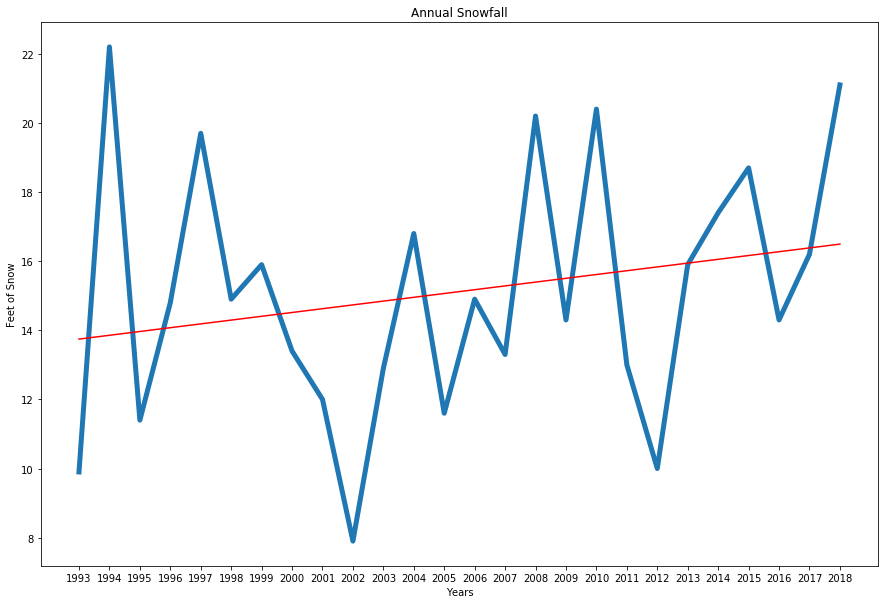

In [14]:
xs = list(range(1993, 2019))
ys = [9.9, 22.2, 11.4, 14.8, 19.7, 14.9, 15.9, 13.4, 12, 7.9, 12.9, 
      16.8, 11.6, 14.9, 13.3, 20.2, 14.3, 20.4, 13, 10, 15.9, 17.4, 
      18.7, 14.3, 16.2, 21.1]

show_time_lines('Annual Snowfall', 'Years', 'Feet of Snow', xs, ys,
                size=(15, 10))

#### <strong>PROBLEM 9.</strong> Using the table from Problem 8, plot the 3- and 5-year moving averages.

Higher numbers of days in moving averages should dampen data fluctuations more. Light green is 3 days and dark green is 5 days.

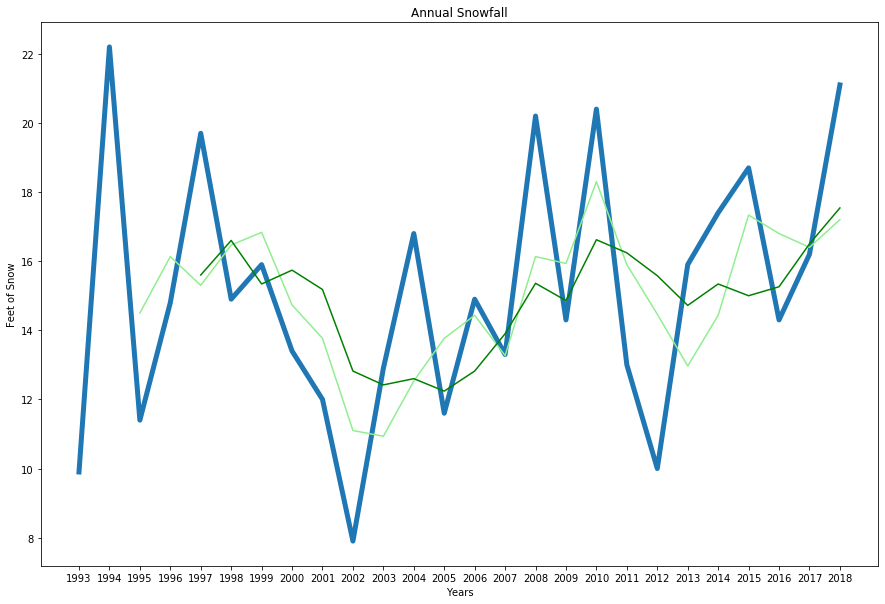

In [15]:
show_time_lines('Annual Snowfall', 'Years', 'Feet of Snow', xs, ys,
                size=(15, 10), regression='no',
                mv_amt_1=3, mv_amt_2=5)

#### <strong>PROBLEM 10.</strong> Using the table from Problem 8, exponentially smooth the data using alpha values 0.3 and 0.1

Lower alpha values for exponential smoothing should smooth data fluctuations more. Light gray is alpha 0.3 and dark gray is alpha 0.1

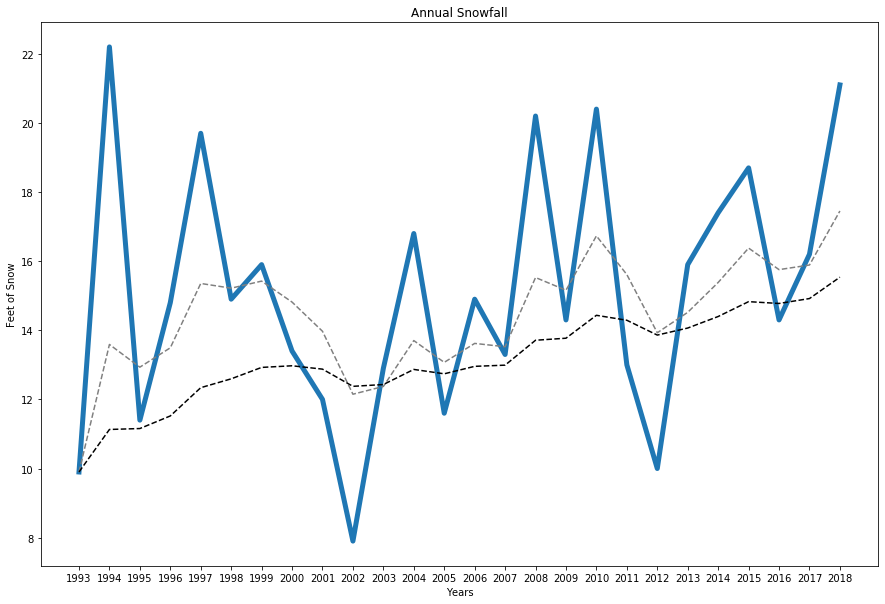

In [16]:
show_time_lines('Annual Snowfall', 'Years', 'Feet of Snow', xs, ys,
                size=(15, 10), regression='no',
                alpha_1=0.3, alpha_2=0.1)